### ModelCheckpoint, Confusion Matrix, ROC curve

In [1]:
%autosave 0
import os
import time

import numpy as np
import seaborn as sb

import tensorflow
import tensorflow as tf

# tensorflow 2.0
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용 함수
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 모델 저장
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

from sklearn.model_selection import train_test_split # 훈련/검증 데이터 분할
from sklearn.metrics import confusion_matrix  # 혼돈행렬, 이항분류 시각화
from sklearn.metrics import roc_curve         # 분류 품질 시각화 

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')


Autosave disabled


In [2]:
data = np.loadtxt('./wine.csv', delimiter=",", dtype=np.float64)
print(type(data))
print(data.shape)  # 6497행 13열

<class 'numpy.ndarray'>
(6497, 13)


In [3]:
X = data[:, 0:12]  # 0 ~ 11, 12개의 데이터 변수 추출
print(X.shape)     # 2차원 배열
Y = data[:, 12]    # 13번째 변수, class, 정답
print(Y.shape)     # 1차원 배열

(6497, 12)
(6497,)


In [4]:
# train_test_split 분할을 통한 훈련, 검증, 테스트 데이터의 분리
# 데이터를 3그룹으로 분할: test 5% -> 95%(train 80%, validation 20%)
seed = 0
# stratify=Y: 0과 1의 분류 비율을 동일하게 데이터를 분할해줌.
# 95%: 분할대기(x_train_all), 5%: 테스트(x_test)
# x_train_all: 훈련 데이터 95% 분할 대기
# x_test: 테스트 데이터 5% 분할
# y_train_all: 훈련 target(class) 95% 분할 대기
# y_test: 테스트 target(class) 5% 분할
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                  stratify=Y,
                                                  test_size=0.05,
                                                  random_state=seed)
# 나머지 데이터 95%를 분할, 80%: 훈련(x_train), 20%: 검증(x_val)
# x_train: 훈련 데이터 80% 분할
# x_val: 검증 데이터 20% 분할
# y_train: 훈련 target(class) 80% 분할
# y_val: 검증 target(class) 20% 분할
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.2,
                                                  random_state=seed)
print(x_train.shape)
print(y_train.shape)
print(y_train[0:100]) # 검증 Target 100건만 출력


(4937, 12)
(4937,)
[0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0.]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                780       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,931
Trainable params: 2,931
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
494/494 [==============================] - 3s 4ms/step - loss: 0.3164 - accuracy: 0.8916 - val_loss: 0.1976 - val_accuracy: 0.9231

Epoch 00001: val_accuracy improved from -inf to 0.92308, saving model to ./model\001-0.9231.h5
Epoch 2/1000

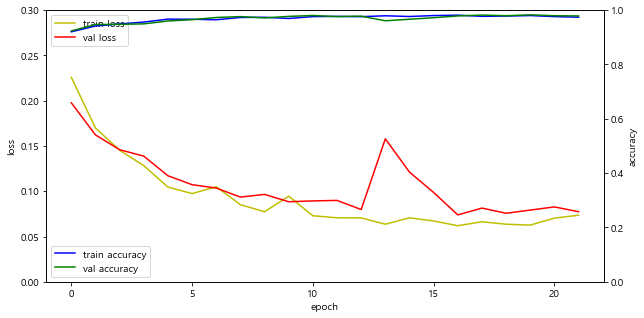

In [6]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()   # 오른쪽 y 축 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.3]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1]) # 0.0, 1: 0 ~ 100 %, 정확도임으로 변경하지 않음

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차
acc_ax.set_ylabel('accuracy') # 정확도

loss_ax.legend(loc='upper left') # 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 정확도 레이블 위치

plt.show()

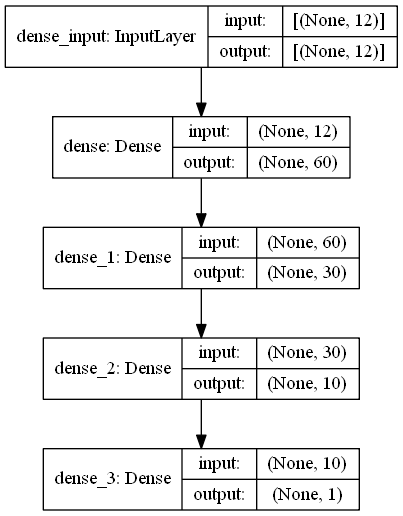

In [7]:
plot_model(model, to_file='./Wine2.png', show_shapes=True, show_layer_names=True)

In [8]:
# verbose=0: 처리과정의 메시지 생략
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.05586277320981026 /정확도: 99.07692074775696 %


In [13]:
# model.save('./Wine2.h5')

In [9]:
# model = load_model('./Wine2.h5')
model = load_model('./model/020-0.9822.h5') # ModelCheckPoint에서 저장됨

In [12]:
p = model.predict(x_test[0:100])
print(p.shape)

(100, 1)


In [13]:
for i in range(len(x_test[0:100])):
    fmt = '실제값: {0}, 예측값: {1}'
    print(fmt.format(y_test[i], p[i]), end='')
    
    # 임계값의 지정, 정확도를 참고하여 판단, 60%이상 합격: 0.6
    if (p[i] >= 0.5): 
        print('--> Red 와인')   # 1
    else:
        print('--> White 와인') # 0

실제값: 0.0, 예측값: [1.888575e-05]--> White 와인
실제값: 0.0, 예측값: [5.478766e-06]--> White 와인
실제값: 1.0, 예측값: [0.99957085]--> Red 와인
실제값: 0.0, 예측값: [0.00290284]--> White 와인
실제값: 1.0, 예측값: [0.99995995]--> Red 와인
실제값: 1.0, 예측값: [0.9999691]--> Red 와인
실제값: 0.0, 예측값: [0.00374481]--> White 와인
실제값: 0.0, 예측값: [0.00061822]--> White 와인
실제값: 0.0, 예측값: [0.46345642]--> White 와인
실제값: 0.0, 예측값: [0.00487053]--> White 와인
실제값: 1.0, 예측값: [0.99605954]--> Red 와인
실제값: 0.0, 예측값: [0.00366083]--> White 와인
실제값: 0.0, 예측값: [0.00099826]--> White 와인
실제값: 1.0, 예측값: [0.9999002]--> Red 와인
실제값: 0.0, 예측값: [0.00041959]--> White 와인
실제값: 0.0, 예측값: [0.00389141]--> White 와인
실제값: 0.0, 예측값: [0.00198281]--> White 와인
실제값: 1.0, 예측값: [0.98457706]--> Red 와인
실제값: 0.0, 예측값: [0.00057346]--> White 와인
실제값: 1.0, 예측값: [0.99999607]--> Red 와인
실제값: 0.0, 예측값: [0.00133845]--> White 와인
실제값: 0.0, 예측값: [0.000496]--> White 와인
실제값: 0.0, 예측값: [0.00170261]--> White 와인
실제값: 0.0, 예측값: [0.00062081]--> White 와인
실제값: 1.0, 예측값: [0.99852645]--> Red 와인
실제값: 0.0, 예측값: [

In [14]:
red = 0
white = 0
for i in range(len(y_test)):
    if y_test[i] == 1:  # red wine 인지 검사
        red = red + 1
    else:
        white = white + 1

print('Red wine:', red)
print('White wine:', white)

Red wine: 80
White wine: 245


In [15]:
# 결과 - 혼돈 행렬, # class 0우선으로 즉 오름차순으로 표가 생성
print(x_test.shape)
y_test_pred = model.predict_classes(x_test)  # 모델 테스트
c_matrix = confusion_matrix(y_test, y_test_pred) # 실제값, 예측값
print(type(c_matrix))
print(c_matrix)
# [[white wine 맞춘 갯수   white wine 틀린 갯수]
#  [red wine 틀린 갯수     red wine 맞춘 갯수]]

(325, 12)
<class 'numpy.ndarray'>
[[245   0]
 [  2  78]]


C:\ProgramData\Anaconda3\envs\machine\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


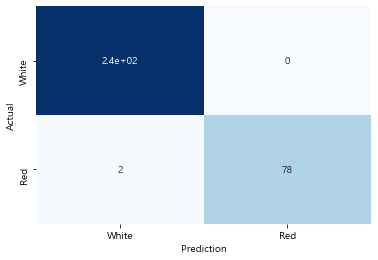

<Figure size 432x288 with 0 Axes>

In [16]:
ax = sb.heatmap(c_matrix, annot=True, 
                 xticklabels=['White', 'Red'], 
                 yticklabels=['White', 'Red'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()
# [[white wine 맞춘 갯수   white wine 틀린 갯수]
#  [red wine 틀린 갯수     red wine 맞춘 갯수]]

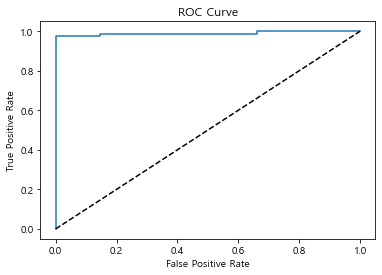

<Figure size 432x288 with 0 Axes>

In [17]:
# 결과 - ROC 곡선
y_test_pred_probs = model.predict(x_test)
# print(y_test_pred_probs)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()